# Chapter 8: Dimension Reduction

This chapter mainly introduces PCA, one of the most popular dimension reduction algorithms, and how to use it to perform dimension reduction on your dataset. For further details on PCA or other advanced dimension reduction algorithms, please refer to other machine learning tutorials.

> This jupyter notebook contains my solution to the coding exercises on the book. For subjective problems, please check the 

## Exercise 9: PCA on MNIST

Requirement: Use PCA to perform dimension reduction on MNIST dataset, and compare the performance before and after PCA.

Just as before, we load the MNIST dataset and separate it into train and test set. Then use PCA to keep 95% variance.

In [2]:
import scipy.io as sio
import numpy as np
mnist = sio.loadmat("mnist-original.mat")
X, y = mnist["data"], mnist["label"]
X = np.transpose(X)
y = np.transpose(y)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

To evaluate the performance of PCA, we train a Random Forest on both dataset, and check the performance of it

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("Precision before PCA:", precision_score(y_test, predictions, average="micro"))

clf_2 = RandomForestClassifier(n_estimators=50)
clf_2.fit(X_train_pca, y_train)
predictions = clf_2.predict(X_test_pca)
print("Precision after PCA:", precision_score(y_test, predictions, average="micro"))

/Users/Antinomy/.pyenv/versions/3.6.5/envs/learningTensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Precision before PCA: 0.9672


/Users/Antinomy/.pyenv/versions/3.6.5/envs/learningTensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Precision after PCA: 0.9428


## Exercise 10: Visualization with Dimension Reduction

Requirement: Use different dimension reduction algorithms on MNIST dataset. Reduce the dataset to 2 dimensions, and visualize the dataset.

Since I work on my laptop, I only do PCA on MNIST and visualize the dataset. If you have more computing power, feel free to try other DR algorithms. 

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Use Matplotlib to visualize the data.

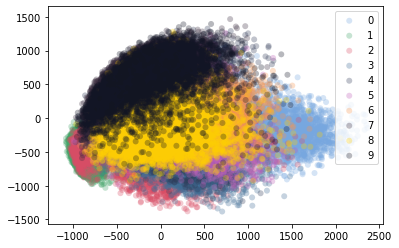

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
counter = 0
for (color, label) in [("#77A7DF", 0), ("#45A56A", 1), ("#D94D65", 2), ("#406D95", 3), ("#2F3A57", 4), ("#BD5FB7", 5), ("#F69651", 6), ("#3B2D3F", 7), ("#FFCF04", 8), ("#121525", 9)]:
#     n = 750
#     x, y = np.random.rand(2, n)
#     scale = 200.0 * np.random.rand(n)
    x = X_train_pca[(counter*6000):(counter+1)*6000, 0]
    y = X_train_pca[(counter*6000):(counter+1)*6000, 1]
    ax.scatter(x, y, c=color, label=label, alpha=0.3, edgecolors='none')
    counter += 1

ax.legend()
ax.grid(False)

plt.show()